# Pembuatan Dataset Sintetis

Untuk mempelajari DBSCAN, kita akan membuat dataset sederhana berupa 3 klaster buatan menggunakan fungsi  make_blobs  dari Scikit-Learn.

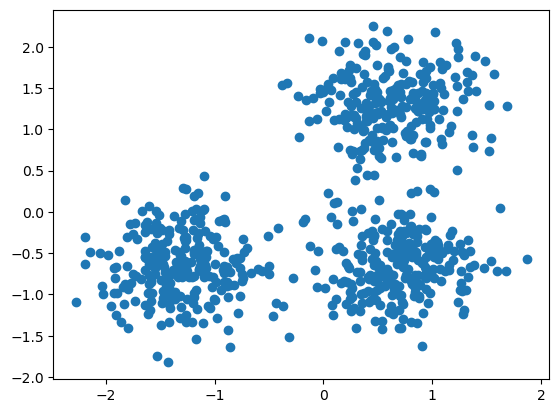

In [47]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
x = StandardScaler().fit_transform(x)

plt.scatter(x[:, 0], x[:, 1])
plt.show()

# Compute DBSCAN
Sekarang kita terapkan DBSCAN pada data tersebut.

Label yang ditetapkan oleh DBSCAN dapat diakses melalui atribut labels_. Titik data yang dianggap noise akan diberi label khusus.




In [48]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
labels = db.labels_

#number of cluster in labels, ignore noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18



eps=0.3 → jarak maksimum antar titik untuk dianggap tetangga.

min_samples=10 → jumlah minimum titik dalam radius eps agar dianggap area padat (core sample).

Label hasil klasterisasi tersedia di labels. Nilai -1 berarti titik tersebut dianggap noise atau outlier.

# Evaluasi Kualitas Klasterisasi
Karena kita menggunakan dataset sintetis (make_blobs), kita tahu label aslinya (labels_true). Ini memungkinkan kita mengukur kualitas DBSCAN dengan berbagai metrik evaluasi.


In [49]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels): .3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels): .3f}")
print(f"V-Measure: {metrics.v_measure_score(labels_true, labels): .3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels): .3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labels_true, labels): .3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels): .3f}")

Homogeneity:  0.953
Completeness:  0.883
V-Measure:  0.917
Adjusted Rand Index:  0.952
Adjusted Mutual Information:  0.916
Silhouette Coefficient:  0.626



Homogeneity → apakah tiap klaster hanya berisi satu label asli.

Completeness → apakah semua sampel dengan label asli yang sama masuk ke klaster yang sama.

V-measure → rata-rata harmonik dari homogeneity dan completeness.

Adjusted Rand Index (ARI) → kesesuaian antara klasterisasi dengan label asli.

Adjusted Mutual Information (AMI) → kesamaan informasi antara klasterisasi dengan label asli.

Silhouette Coefficient → seberapa baik data dikelompokkan (nilai mendekati 1 berarti bagus, mendekati 0 berarti berada di batas, negatif berarti salah klaster).

# Visualisasi Hasil Klasterisasi
Kita akan memvisualisasikan hasil DBSCAN.

Core sample ditampilkan dengan titik besar.

Non-core sample ditampilkan dengan titik kecil.

Noise ditampilkan dengan warna hitam.

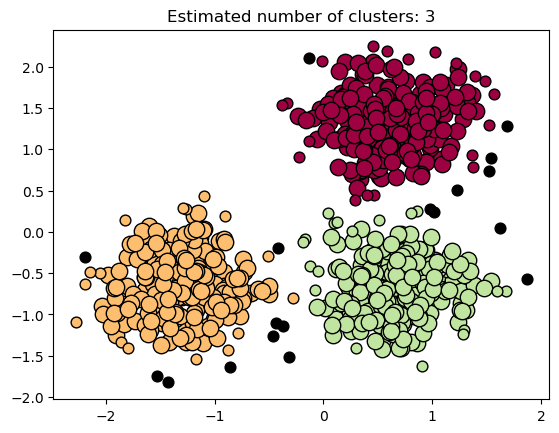

In [50]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# colors = [plt.cm.Spectral(each) for each in (0,1, len(unique_labels))]
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col, in zip(unique_labels, colors):
    if k == -1:
        #black digunakan untuk noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    (
        plt.scatter(
            xy[:,0], xy[:, 1], marker="o", facecolor=tuple(col), edgecolor="k", s=140
        )
    )

    xy = x[class_member_mask & ~core_samples_mask]
    (
        plt.scatter(
            xy[:, 0], xy[:, 1], marker="o", facecolor=tuple(col), edgecolor="k", s=60
        )
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

👉 Interpretasi visual:

Titik besar berwarna → core samples dalam klaster.

Titik kecil berwarna → non-core samples, tetap termasuk klaster.

Titik hitam → noise/outlier.